In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('Example').getOrCreate()

24/06/08 21:20:51 WARN Utils: Your hostname, Ugurs-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 192.168.0.28 instead (on interface en0)
24/06/08 21:20:51 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/06/08 21:20:51 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
spark

                                             SPILL TEST

In [5]:
from pyspark import SparkConf
from pyspark.sql import SparkSession

spark.sparkContext.setJobDescription('spill')  # Setting Job description
data = range(0, 100000)
# Create DataFrame with a lot of records
df = spark.createDataFrame(data, "int").toDF("id")
df.cache().count()

# Create a temporary view so we can run SQL queries
df.createOrReplaceTempView("records")

# Force a spill. The high number of partitions and usage of `UNION ALL`
# will generate a big number of records in memory
df2 = spark.sql("""
    SELECT /*+ REPARTITION(10) */ id 
    FROM records 
    UNION ALL 
    SELECT /*+ REPARTITION(10) */ id 
    FROM records
""")
df2.cache().count()

200000

In [7]:
from sparkpyrest.spark_pyrest import SparkPyRest

spr = SparkPyRest("localhost")

In [8]:
spr.app

'local-1717870852845'

In [9]:
spr.jobs

display() will give you the job info

In [10]:
spr.jobs.display()

,jobId,name,description,stageIds
0,7,count at NativeMethodAccessorImpl.java:0,spill,"[15, 12, 13, 14]"
1,6,count at NativeMethodAccessorImpl.java:0,spill,"[9, 10, 11]"
2,5,count at NativeMethodAccessorImpl.java:0,spill,"[6, 7, 8]"
3,4,count at NativeMethodAccessorImpl.java:0,spill,[5]
4,3,count at NativeMethodAccessorImpl.java:0,spill,[4]
5,2,count at NativeMethodAccessorImpl.java:0,spill,"[2, 3]"
6,1,count at NativeMethodAccessorImpl.java:0,spill,[1]
7,0,count at NativeMethodAccessorImpl.java:0,spill,[0]


In [11]:
spr.stages

display() will give you the stage info

In [12]:
spr.stages.display()

,jobId,description,status,stageId,attemptId,numTasks,numActiveTasks,numCompleteTasks,numFailedTasks,numKilledTasks,...,shuffleMergedLocalBlocksFetched,shuffleMergedRemoteChunksFetched,shuffleMergedLocalChunksFetched,shuffleMergedRemoteBytesRead,shuffleMergedLocalBytesRead,shuffleRemoteReqsDuration,shuffleMergedRemoteReqsDuration,shuffleWriteBytes,shuffleWriteTime,shuffleWriteRecords
0,7,spill,COMPLETE,15,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,spill,SKIPPED,12,0,10,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,spill,SKIPPED,13,0,10,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,spill,SKIPPED,14,0,20,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,spill,SKIPPED,9,0,10,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,spill,SKIPPED,10,0,10,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,6,spill,COMPLETE,11,0,20,0,20,0,0,...,0,0,0,0,0,0,0,1180,161063419,20
7,5,spill,SKIPPED,6,0,10,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,spill,SKIPPED,7,0,10,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,5,spill,COMPLETE,8,0,20,0,20,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
spr.stages.analyze()

'analyzing'

In [42]:
spr.tasks(10)

ConnectionError: HTTPConnectionPool(host='localhost', port=4040): Max retries exceeded with url: /api/v1/applications (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x168fa7310>: Failed to establish a new connection: [Errno 61] Connection refused'))

In [17]:
spr.sql


http://localhost:4040/api/v1/applications/local-1717870852845/sql/


display() will give you the job info

In [18]:
spr.sql.display()


http://localhost:4040/api/v1/applications/local-1717870852845/sql/


,id,submissionTime,duration,runningJobIds,successJobIds,failedJobIds,nodeId,nodeName,name,value
0,0,2024-06-08T18:20:56.377GMT,6237,[],"[0, 1, 2]",[],9,Scan ExistingRDD,number of output rows,"100,000"
1,0,2024-06-08T18:20:56.377GMT,6237,[],"[0, 1, 2]",[],7,WholeStageCodegen (1),duration,"total (min, med, max (stageId: taskId))\n9.1 s..."
2,0,2024-06-08T18:20:56.377GMT,6237,[],"[0, 1, 2]",[],6,InMemoryTableScan,number of output rows,"100,000"
3,0,2024-06-08T18:20:56.377GMT,6237,[],"[0, 1, 2]",[],5,HashAggregate,time in aggregation build,"total (min, med, max (stageId: taskId))\n121 m..."
4,0,2024-06-08T18:20:56.377GMT,6237,[],"[0, 1, 2]",[],5,HashAggregate,number of output rows,10
...,...,...,...,...,...,...,...,...,...,...
105,2,2024-06-08T18:21:02.915GMT,2194,[],"[5, 6, 7, 3, 4]",[],3,Exchange,remote bytes read to disk,0.0 B
106,2,2024-06-08T18:21:02.915GMT,2194,[],"[5, 6, 7, 3, 4]",[],3,Exchange,shuffle bytes written,"total (min, med, max (stageId: taskId))\n1180...."
107,2,2024-06-08T18:21:02.915GMT,2194,[],"[5, 6, 7, 3, 4]",[],2,HashAggregate,time in aggregation build,1 ms
108,2,2024-06-08T18:21:02.915GMT,2194,[],"[5, 6, 7, 3, 4]",[],2,HashAggregate,number of output rows,1


In [71]:
spr.sql.display()[['id','nodeId','nodeName','name','value']]


http://localhost:4040/api/v1/applications/local-1717865289929/sql/


,id,nodeId,nodeName,name,value
0,0,9,Scan ExistingRDD,number of output rows,"100,000"
1,0,7,WholeStageCodegen (1),duration,"total (min, med, max (stageId: taskId))\n9.1 s..."
2,0,6,InMemoryTableScan,number of output rows,"100,000"
3,0,5,HashAggregate,time in aggregation build,"total (min, med, max (stageId: taskId))\n186 m..."
4,0,5,HashAggregate,number of output rows,10
...,...,...,...,...,...
105,2,3,Exchange,remote bytes read to disk,0.0 B
106,2,3,Exchange,shuffle bytes written,"total (min, med, max (stageId: taskId))\n1180...."
107,2,2,HashAggregate,time in aggregation build,3 ms
108,2,2,HashAggregate,number of output rows,1


In [ ]:
spr.tasks(15)

In [13]:
host_tasks = spr.tasks(1)[['host','bytesWritten','remoteBytesRead','executorRunTime']].groupby('host')

host_tasks.describe()

bytesWritten                                                \
                    count  mean       std   min   25%   50%   75%   max   
host                                                                      
192.168.0.30         10.0  58.1  0.316228  58.0  58.0  58.0  58.0  59.0   

             remoteBytesRead       ...           executorRunTime         \
                       count mean  ...  75%  max           count   mean   
host                               ...                                    
192.168.0.30            10.0  0.0  ...  0.0  0.0            10.0  420.1   

                                                            
                   std    min     25%    50%    75%    max  
host                                                        
192.168.0.30  2.282786  415.0  419.25  420.5  422.0  422.0  

[1 rows x 24 columns]

In [36]:
host_tasks = spr.tasks(5)[['host','bytesWritten']].groupby('host')

host_tasks.describe()

http://localhost:4040/api/v1/applications/local-1717865289929/stages/5
37
38
33
32
34
39
35
31
40
36


bytesWritten                                                   \
                    count     mean          std      min      25%      50%   
host                                                                         
192.168.0.28         10.0  52388.4  2106.423783  49181.0  50559.5  52456.5   

                                
                  75%      max  
host                            
192.168.0.28  54373.0  54621.0

<Axes: xlabel='host'>

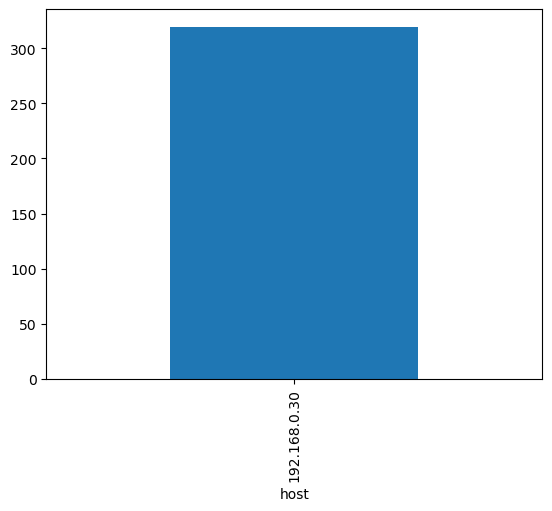

In [22]:
mean_runtime = host_tasks.mean()['executorRunTime']

mean_runtime.plot(kind='bar')

                                                    SKEW TEST

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import explode, col
import random

# Spark session oluşturuluyor
spark.sparkContext.setJobDescription('skew')  # Setting Job description
sc = spark.sparkContext

# Büyük bir RDD yaratılıyor
rdd = sc.parallelize([(i, random.randint(0,1000000)) for i in range(10000000)])

# Key'ler bazen aynı olacak şekilde RDD'ye bozuk veri ekleniyor
rdd = rdd.union(sc.parallelize([(0, i) for i in range(1000000)]))

# Reduce operasyonunda shuffle ve skewed data oluştuğundan emin olunur
result_rdd = rdd.reduceByKey(lambda a, b: a + b)

result_rdd.collect()

                                            SMALL FILES TEST

In [22]:
spark.sparkContext.setJobDescription('scan tiny files')  # Setting Job description

weather = spark.read.parquet("/Users/ugurkalkavan/Downloads/m06sparkbasics/weather")
weather.filter(weather["year"]==2022).count()

450787193

In [23]:
spark.sparkContext.setJobDescription('scan tiny files 2')  # Setting Job description

df_str = spark.read.parquet("/Users/ugurkalkavan/tmp/df_str")
df_str.count()

100000000

In [26]:
spark.sparkContext.setJobDescription('scan tiny files 3')  # Setting Job description

weather = spark.read.parquet("/Users/ugurkalkavan/Downloads/m06sparkbasics/weather")
weather.count()

3604627124